In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [ ]:
## UNDERSTANDING DATA #####

In [61]:
## Reading csv file
housing =pd.read_csv('/Users/shekher.r/upgrade/python/Juune-ML53/ML/advance_regression/train.csv');


In [62]:
## top 5 record 
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
housing.shape

(1460, 81)

In [75]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [63]:
## calculate missing value percentage
def missigValues():
    totalMissingValues=housing.isnull().sum().sort_values(ascending=False)
    percentageMissingvalue=round(housing.isnull().sum()*100/len(housing),2).sort_values(ascending=False)
    all_feature_nullValues=pd.concat([totalMissingValues,percentageMissingvalue],axis=1, keys=['Total', 'Percent'])
    all_feature_nullValues=all_feature_nullValues[all_feature_nullValues['Total']!=0]
    
    if(len(all_feature_nullValues)==0):
        return "no column with missinng value"
    else:
        return all_feature_nullValues

print(missigValues())

              Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageYrBlt      81     5.55
GarageCond       81     5.55
GarageType       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtFinType2     38     2.60
BsmtExposure     38     2.60
BsmtQual         37     2.53
BsmtCond         37     2.53
BsmtFinType1     37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07


In [ ]:
                                            ## cleaning Data

In [64]:
## list of columns with meaningfull NA value=None
columns_with_meaningfullnullValues=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType']

In [65]:

for col in columns_with_meaningfullnullValues:
    before=housing[col].isnull().sum()
    housing[col].fillna('None',inplace=True)
    print(before,"MissingValue imputed for column ",col)

1369 MissingValue imputed for column  Alley
37 MissingValue imputed for column  BsmtQual
37 MissingValue imputed for column  BsmtCond
38 MissingValue imputed for column  BsmtExposure
37 MissingValue imputed for column  BsmtFinType1
38 MissingValue imputed for column  BsmtFinType2
690 MissingValue imputed for column  FireplaceQu
81 MissingValue imputed for column  GarageType
81 MissingValue imputed for column  GarageFinish
81 MissingValue imputed for column  GarageQual
81 MissingValue imputed for column  GarageCond
1453 MissingValue imputed for column  PoolQC
1179 MissingValue imputed for column  Fence
1406 MissingValue imputed for column  MiscFeature
8 MissingValue imputed for column  MasVnrType


In [66]:
## after imputing NA value missing value
missigValues()

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [67]:
## columns in which null value can be replaced with median
columns_non_meaningfull_null = ["GarageYrBlt", "MasVnrArea"]

for column in columns_non_meaningfull_null:
    before = housing[column].isnull().sum()
    housing[column].fillna(housing[column].median(), inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
missigValues()

81 missing values of GarageYrBlt imputed.
8 missing values of MasVnrArea imputed.


,Total,Percent
LotFrontage,259,17.74
Electrical,1,0.07


In [71]:
## dropping columns with large missing value
housing.drop(columns=['LotFrontage'],inplace=True)


In [72]:
# Printing columns with null values
missigValues()

,Total,Percent
Electrical,1,0.07


In [73]:
housing.dropna(inplace=True)
# Printing columns with null values
missigValues()

'no column with missinng value'

In [74]:
housing.shape

(1459, 80)

In [ ]:
                                            ## Analysing Data

In [76]:
## putting all float and int columns  in one data frame
housing_num=housing.select_dtypes(include=['float64', 'int64'])
print(housing_num.shape)

(1459, 37)


In [77]:
housing_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [89]:
## dropping id column
housing_num.drop(columns=['Id'],inplace=True)

In [81]:
housing_num.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [86]:
## visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
## supress warings
import warnings
warnings.filterwarnings('ignore')

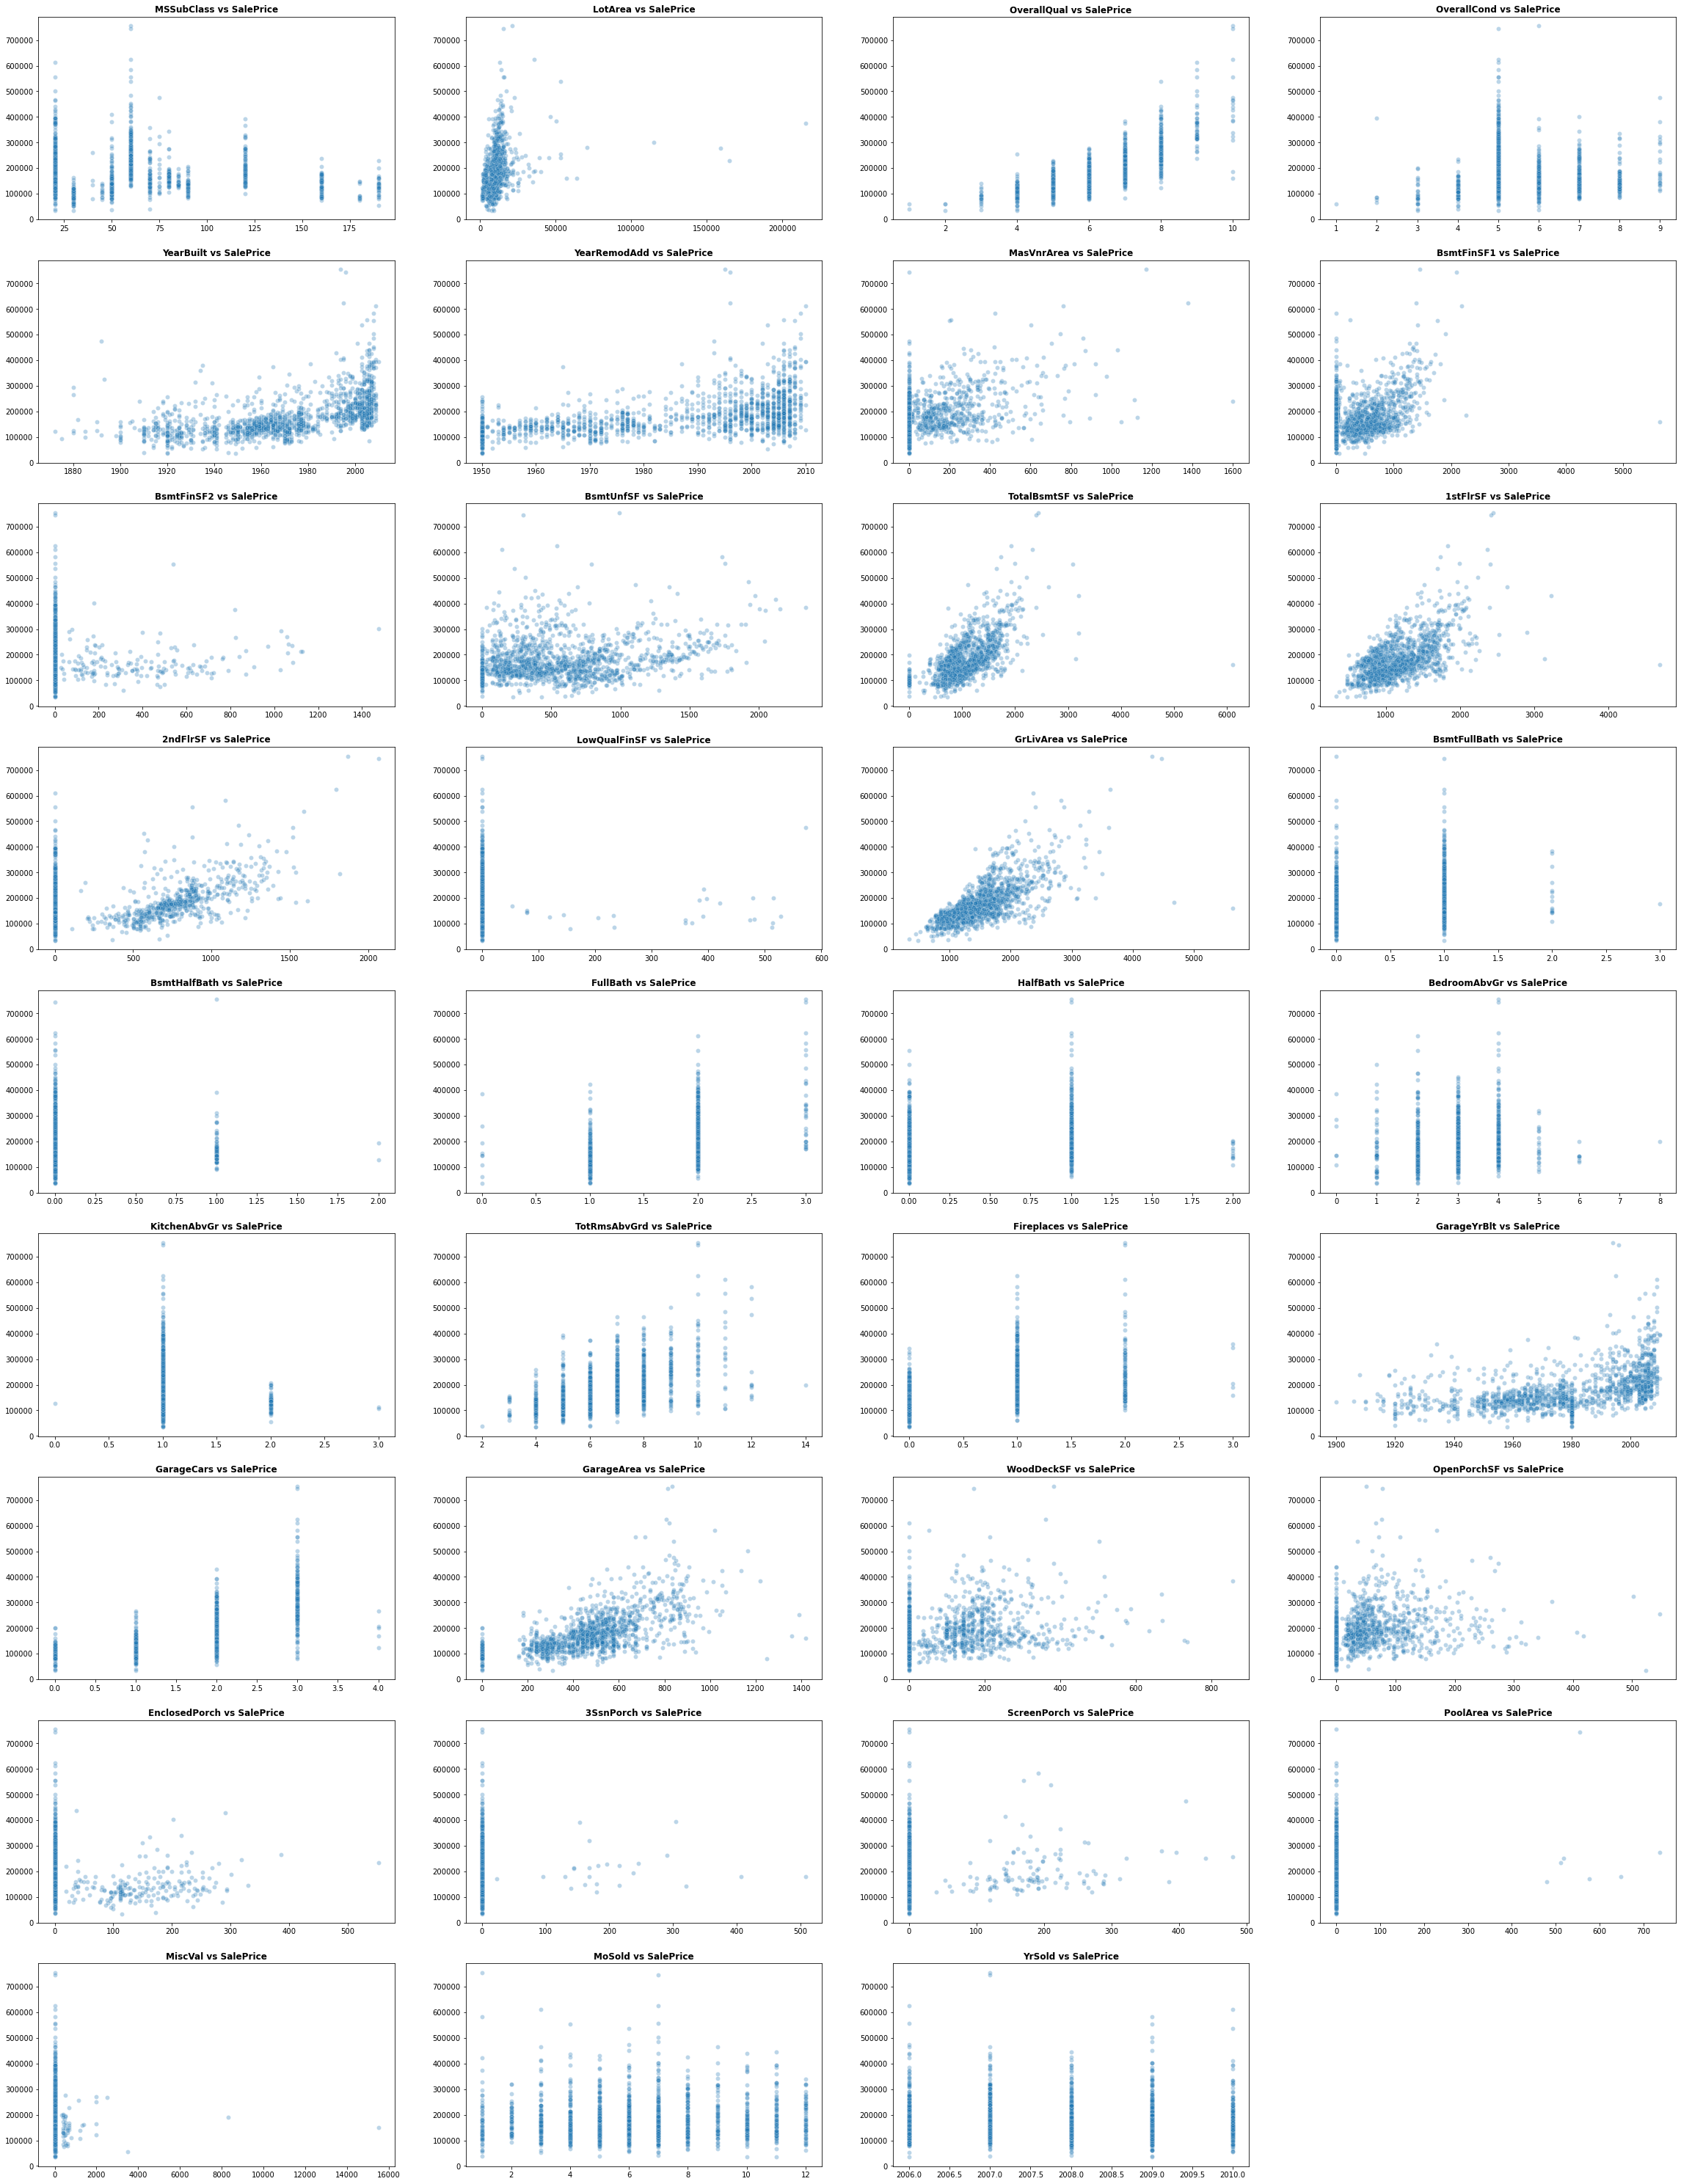

In [90]:
## visualising numeric values
count = 1
plt.figure(figsize=(40, 60))
for column in housing_num.columns:
    if column != 'SalePrice':
        plt.subplot(10, 4, count)
        sns.scatterplot(housing_num[column], housing_num['SalePrice'], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs SalePrice" , weight='bold')
        count += 1
    
plt.show()

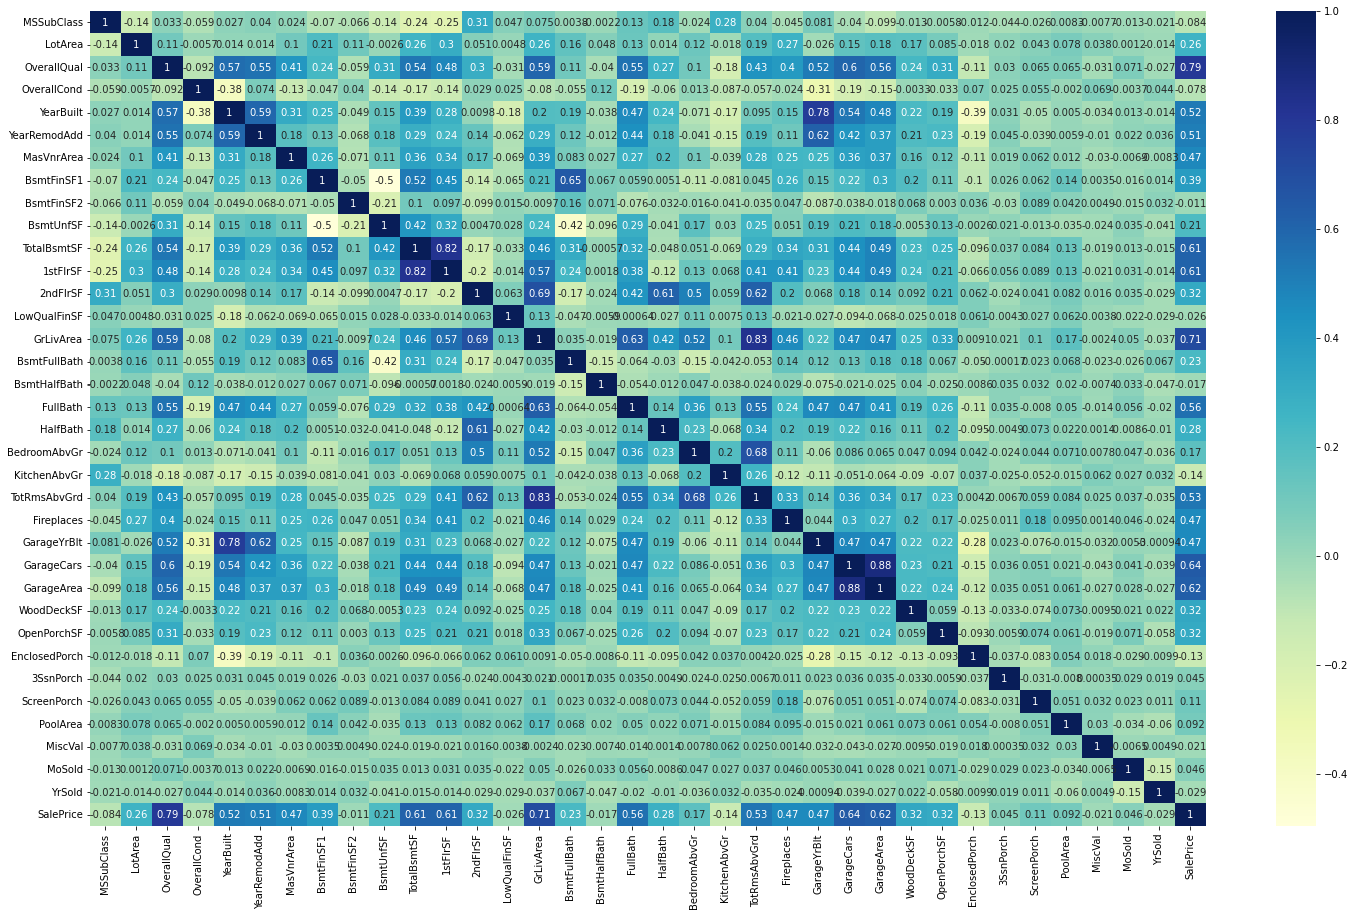

In [94]:
## plotting correlation
plt.figure(figsize = (25, 15))
sns.heatmap(housing_num.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [95]:
# Making all categoric variables (object) in one dataset 
housing_obj = housing.select_dtypes(exclude=['float64', 'int64'])
housing_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [96]:
housing_obj.shape

(1459, 43)

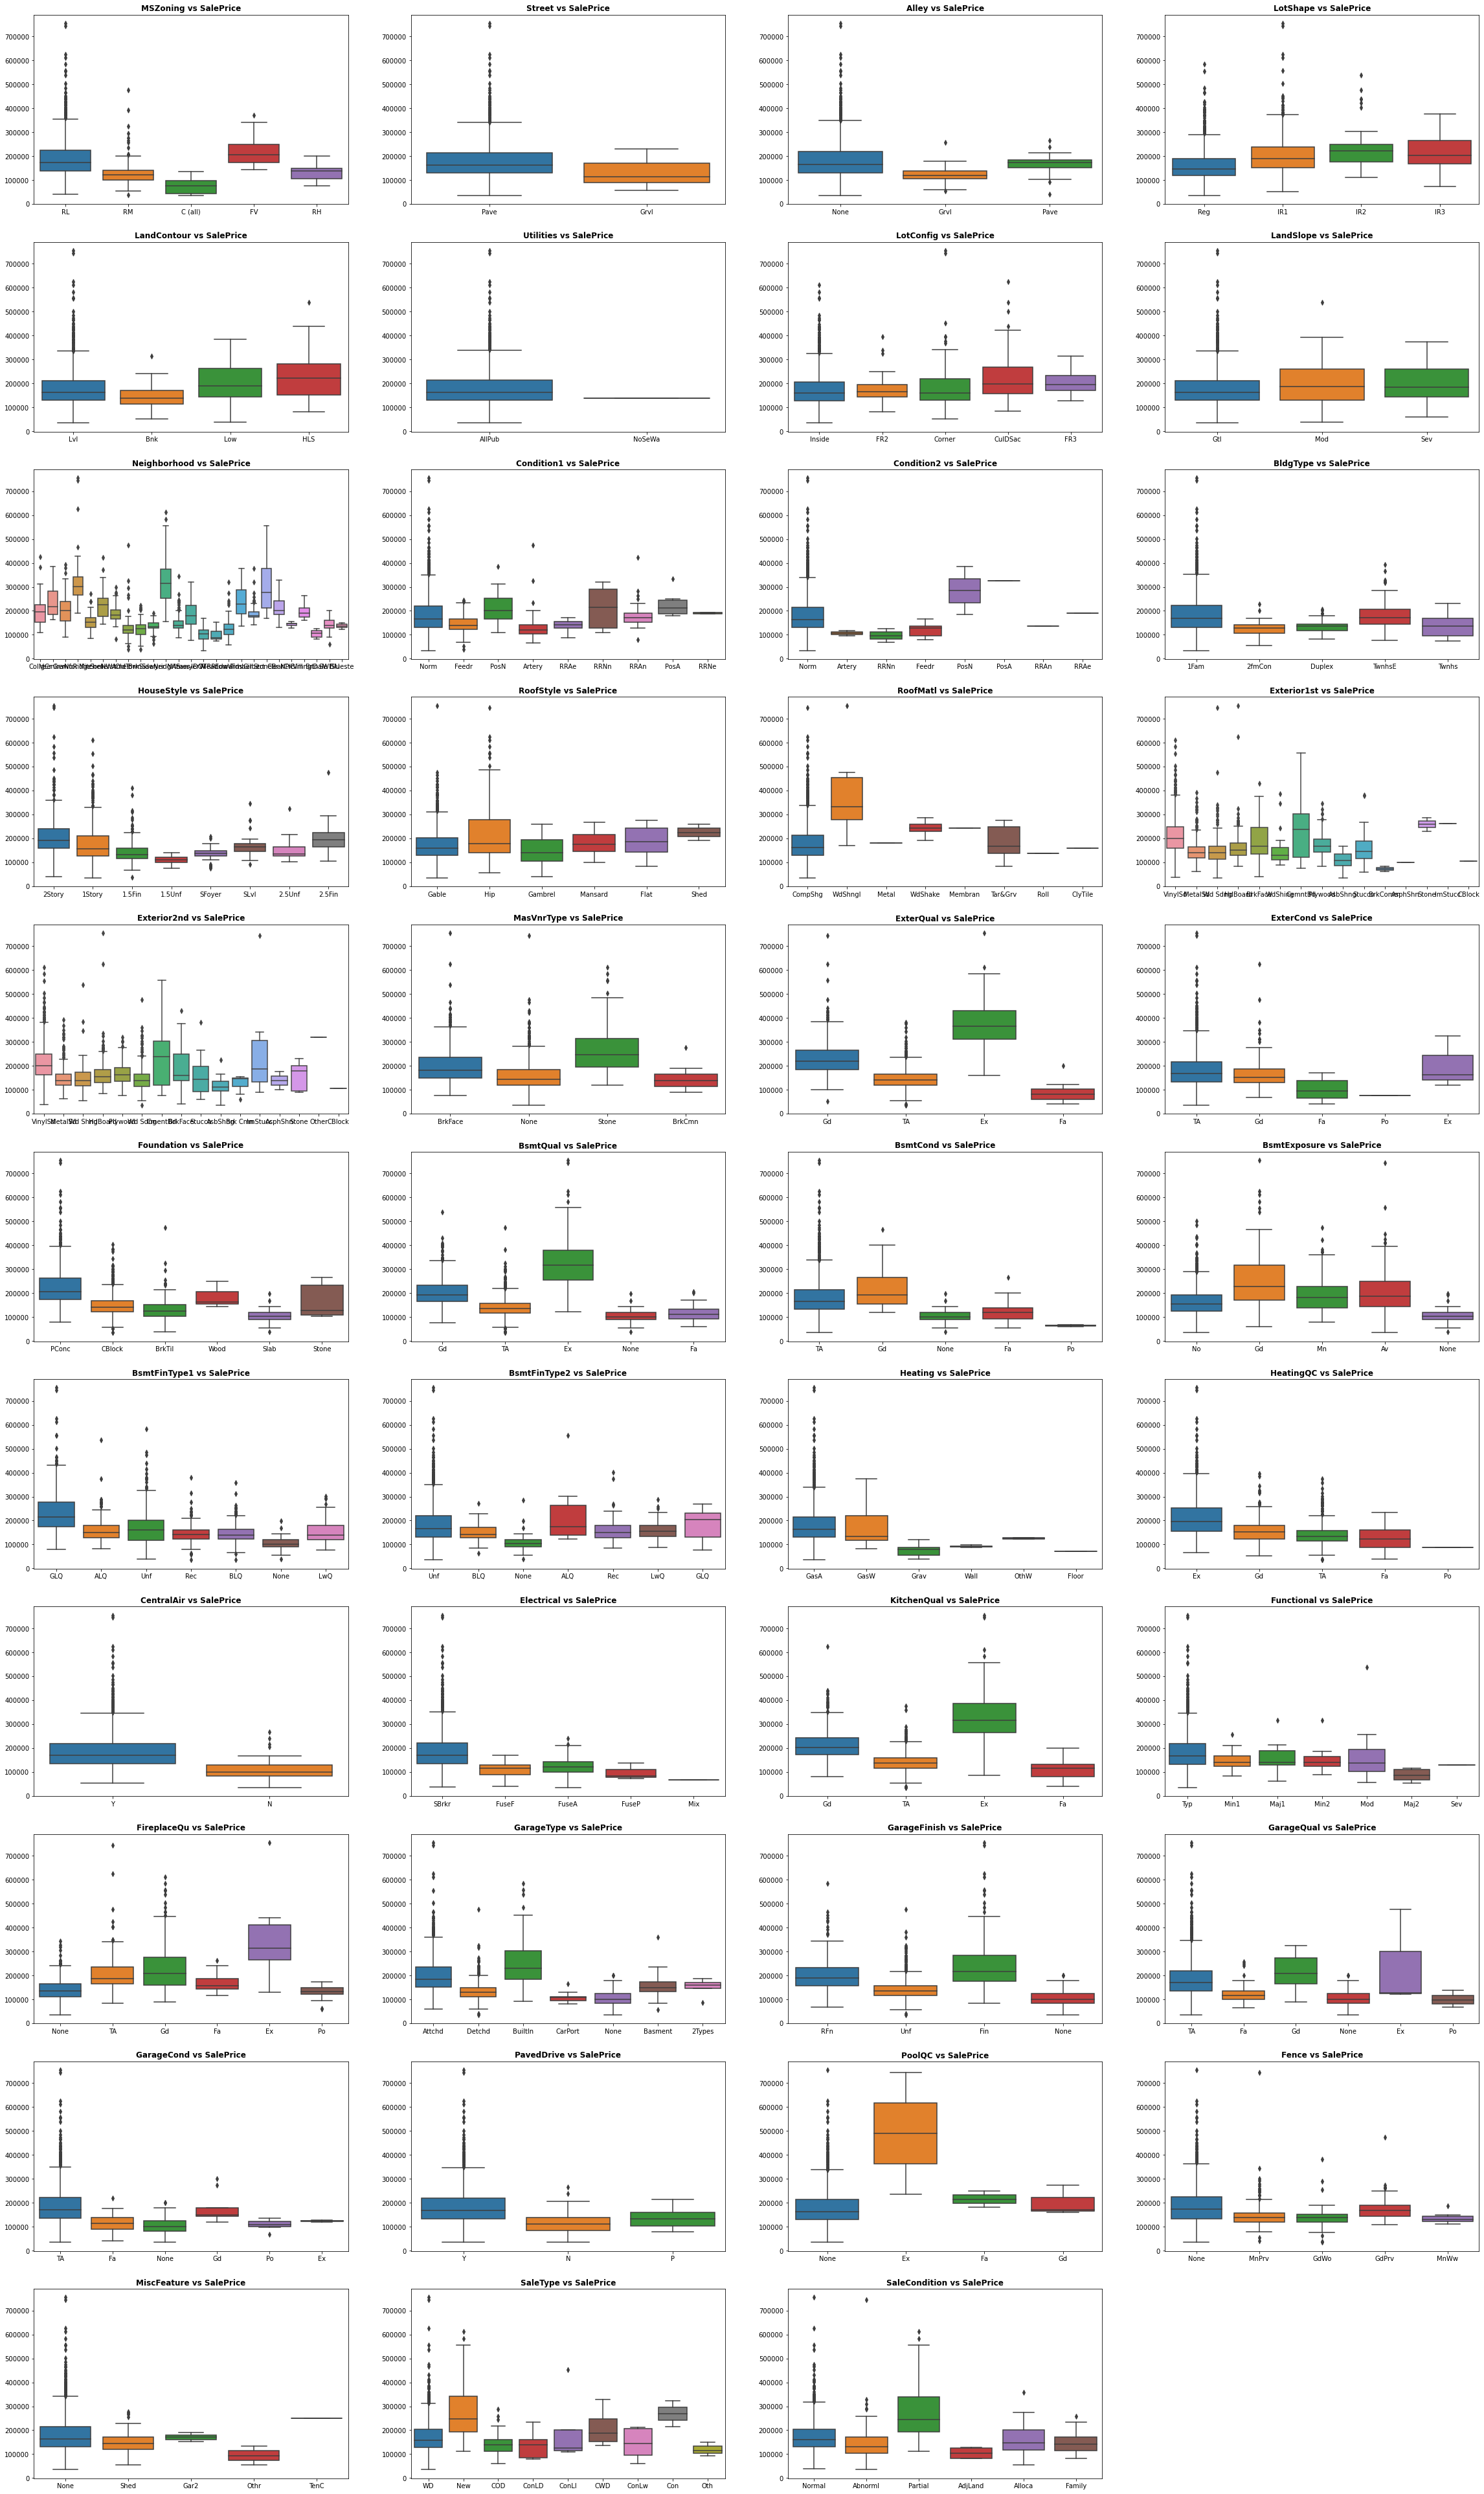

In [100]:
## visualising categorical values
count = 1
plt.figure(figsize=(40, 70))
for column in housing_obj.columns:
    if column != 'SalePrice':
        plt.subplot(11, 4, count)
        sns.boxplot(x=housing[column], y=housing['SalePrice']).set(ylabel=None, xlabel=None)
        plt.title(column + " vs SalePrice" , weight='bold')
        count += 1
    
plt.show()